In [1]:
#import libraries 
%matplotlib inline
from sklearn.datasets import load_digits
import matplotlib.pyplot as py
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
#load database
digits = load_digits()

<Figure size 432x288 with 0 Axes>

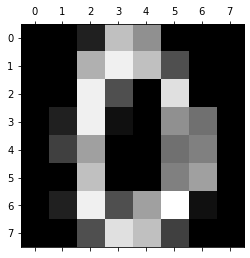

In [3]:
#plot database
py.gray() 
py.matshow(digits.images[130])

In [4]:
digits.target[130]

0

In [5]:
#get test & train data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [6]:
#train model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\hemal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
model.score(X_test, y_test)

0.975

In [8]:
model.predict(digits.data[25:35])

array([5, 6, 7, 8, 9, 0, 9, 5, 5, 6])

In [11]:
import pickle

with open("mnist_trained_model", 'wb') as file:
    pickle.dump(model,file)

# getting confusion matrix

In [9]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  2,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 41,  0,  0],
       [ 1,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 33]], dtype=int64)

Text(69.0, 0.5, 'Truth')

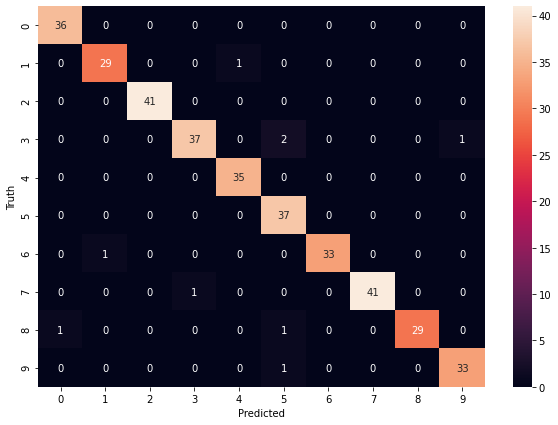

In [10]:
import seaborn as sn
py.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
py.xlabel('Predicted')
py.ylabel('Truth')